In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet import *
from NN_library.AutoUnet.train_AutoUnet import *
%load_ext autoreload
%autoreload 2

Using device: cuda


In [2]:
data = dataset_nonuniform()
loaders = get_loaders(data, 16)
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)

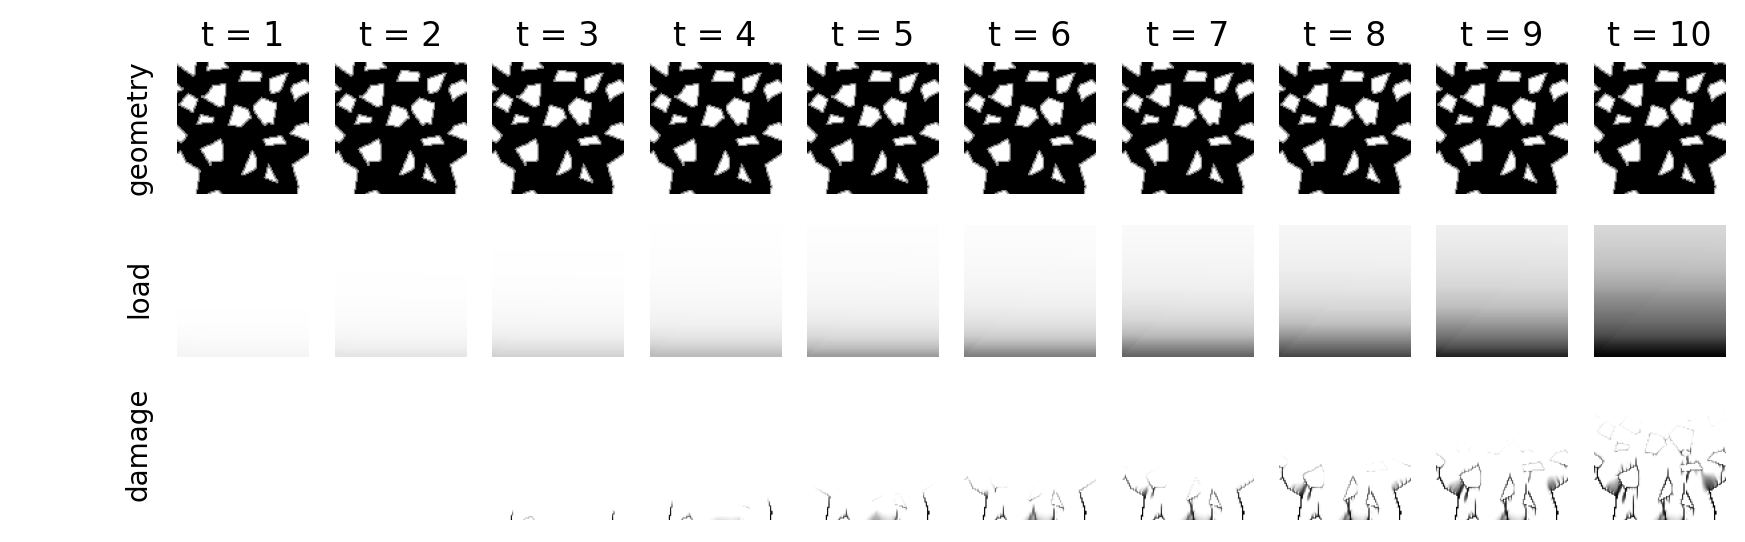

In [3]:
fig, axs = plt.subplots(nrows=3, ncols=11, figsize=(11, 3), dpi=200)
for i in range(10):
    axs[0,i+1].imshow(geometry[0], cmap='Greys', vmin=0, vmax=1)
    axs[0,i+1].set_title(f't = {i+1}')
    axs[0,i+1].set_axis_off()
    axs[1,i+1].imshow(imp_shrinkage[i+1] / (-0.001), cmap='Greys', vmin=0, vmax=1)
    axs[1,i+1].set_axis_off()
    axs[2,i+1].imshow(damage[i], cmap='Greys')
    axs[2,i+1].set_axis_off()
axs[0,0].text(0.8, 0.05, 'geometry', rotation='vertical')
axs[0,0].set_axis_off()
axs[1,0].text(0.8, 0.35, 'load', rotation='vertical')
axs[1,0].set_axis_off()
axs[2,0].text(0.8, 0.2, 'damage', rotation='vertical')
axs[2,0].set_axis_off()

In [3]:
name = 'NN_library/AutoUnet/AutoUnet'
args = {'lr' : 0.00001, 'epochs' : 50, 'dev' : dev, 'name' : name}

In [4]:
unet = AutoUNet()

In [5]:
torch.cuda.empty_cache() 

In [6]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 7697345


In [8]:
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_uniform', args)

In [7]:
unet = load_network(unet, name + '_49', args)

In [8]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  143.8161546988
Epoch: 0 batch: 100 mean train loss:  147.2689395251
Epoch: 0 batch: 200 mean train loss:  120.1813046134
Epoch: 0 batch: 300 mean train loss:  115.2569245826
Epoch: 0 batch: 400 mean train loss:  122.8095841627
Epoch: 0 batch: 500 mean train loss:  121.7410797318
Epoch: 0 batch: 600 mean train loss:  114.5028378982
Epoch: 0 batch: 700 mean train loss:  130.9176672311
Epoch: 0 mean train loss:  130.9190162071 mean val. rec. loss:  952.0962524414
Epoch: 1 batch: 0 mean train loss:  131.1430324961
Epoch: 1 batch: 100 mean train loss:  144.1589197610
Epoch: 1 batch: 200 mean train loss:  139.5112478551
Epoch: 1 batch: 300 mean train loss:  123.8280268889
Epoch: 1 batch: 400 mean train loss:  125.6590290312
Epoch: 1 batch: 500 mean train loss:  118.1688323924
Epoch: 1 batch: 600 mean train loss:  126.6918963431
Epoch: 1 batch: 700 mean train loss:  129.2039180011
Epoch: 1 mean train loss:  130.9891849197 mean val. rec. loss:  950.222656250

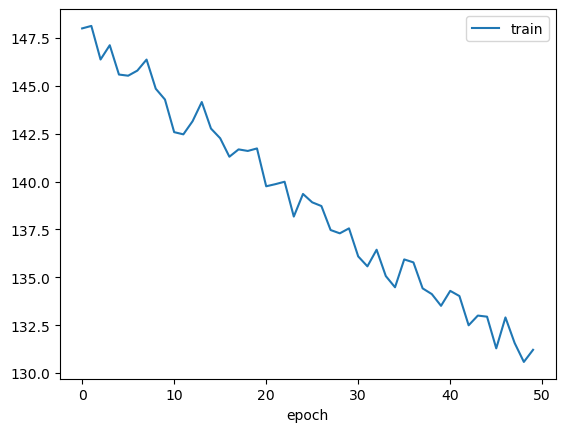

In [9]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

## Train with Convnet

In [3]:
from NN_library.ConvNet.ConvNet_uniform import *
from NN_library.ConvNet.train_ConvNet import *
name = 'NN_library/AutoUnet/AutoUnet_w_Conv_new_norm'
conv_name = 'NN_library/ConvNet/Conv_w_AutoUnet_new_norm'

Using device: cuda


In [4]:
args = {'lr' : 0.000001, 'epochs' : 20, 'dev' : dev, 'name' : name, 'conv_name' : conv_name}

In [5]:
unet = AutoUNet()
convnet = ConvNet(16)

In [6]:
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_new_pt_norm', args)

In [7]:
convnet = load_network(convnet, 'NN_library/ConvNet/ConvNet_new_norm', args)

In [11]:
convnet = load_network(convnet, conv_name + '_19', args)

In [12]:
unet = load_network(unet, name + '_19', args)  

In [8]:
losses_train, losses_val = train_w_Conv(unet, convnet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  0.2180334940
Epoch: 0 batch: 100 mean train loss:  0.1948171209
Epoch: 0 batch: 200 mean train loss:  0.1573901025
Epoch: 0 batch: 300 mean train loss:  0.1357491214
Epoch: 0 batch: 400 mean train loss:  0.1480008778
Epoch: 0 batch: 500 mean train loss:  0.1637616372
Epoch: 0 batch: 600 mean train loss:  0.1454190619
Epoch: 0 batch: 700 mean train loss:  0.1438969141
Epoch: 0 mean train loss:  0.1554774208 mean val. rec. loss:  0.1098317355
Epoch: 1 batch: 0 mean train loss:  0.1489758086
Epoch: 1 batch: 100 mean train loss:  0.1563940614
Epoch: 1 batch: 200 mean train loss:  0.1577298634
Epoch: 1 batch: 300 mean train loss:  0.1280619935
Epoch: 1 batch: 400 mean train loss:  0.1495310240
Epoch: 1 batch: 500 mean train loss:  0.1612816788
Epoch: 1 batch: 600 mean train loss:  0.1530179325
Epoch: 1 batch: 700 mean train loss:  0.1470336628
Epoch: 1 mean train loss:  0.1512650517 mean val. rec. loss:  0.1072374508
Epoch: 2 batch: 0 mean train loss:  0.

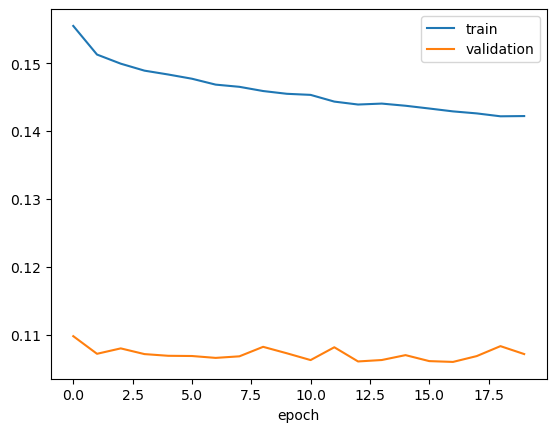

In [9]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])